<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 4:</span> Model Training</h1>
<hr>


We've spent all our time on the 3 steps leading up to this one on: 
* Exploratory Analysis
* Data Cleaning
* Feature Engineering

That is because the biggest jumps in model performance are from **better data**, not from fancier algorithms.

At last, time to build the model.

The essential modeling steps:

1. [Split your dataset](#split)
2. [Build model pipelines](#pipelines)
3. [Declare hyperparameters to tune](#hyperparameters)
4. [Fit and tune models with cross-validation](#fit-tune)
5. [Evaluate metrics and select winner](#evaluate)

### Firstly,  import libraries, recruit models, and load the analytical base table.

In [17]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

import the algorithms we plan to experiment with.

In [18]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

we'll be relying heavily on Scikit-Learn, which has many helpful functions we can take advantage of. However, we won't import everything right away. Instead, we'll be importing each function from Scikit-Learn as we need it. That way, we can point out where you can find each function.


Next, let's load the analytical base table from Module 3.

In [16]:
# Load cleaned and engineered dataset 
df = pd.read_csv('analytical_base_table.csv')

print(df.shape)
df.head()

(1863, 40)


,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,0,0.000,107,9,30,19,89,6,47,58,33.000,65.000,84.000,234.000,81.000,9.000,3.000,0,1,0,-6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,216500,1,1,612,0,1.000,105,15,6,13,87,2,26,14,39.000,73.000,69.000,169.000,51.000,3.000,3.000,0,0,41,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
2,279900,1,1,615,0,0.000,183,13,31,30,101,10,74,62,28.000,15.000,86.000,216.000,74.000,8.000,3.000,0,1,49,-5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,379900,1,1,618,33541,0.000,198,9,38,25,127,11,72,83,36.000,25.000,91.000,265.000,92.000,9.000,3.000,0,0,5,-6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,340000,1,1,634,0,0.000,149,7,22,20,83,10,50,73,37.000,20.000,75.000,88.000,30.000,9.000,3.000,0,0,10,-6.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


<br id="split">
# 1. Split your dataset

<br> import the <code style="color:steelblue">train_test_split()</code> function from Scikit-Learn.

Comparing test vs. training performance allows us to avoid overfitting. If the model performs very well on the training data but poorly on the test data, then it's overfit.

In [15]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

**Remember: cross-validation can be one of our best allies against overfitting (k-fold CV and randomized CV)**

Separate your dataframe into separate objects for the target variable (<code style="color:steelblue">y</code>) and the input features (<code style="color:steelblue">X</code>).

In [20]:
# Create separate object for target variable
y = df.tx_price
# Create separate object for input features
X = df.drop('tx_price', axis=1)

**Split <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> into training and test sets using the <code style="color:steelblue">train_test_split()</code> function.** 

In [22]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Confirm we have the right number of observations in each subset.
<br>
**Next, run this code to confirm the size of each subset is correct.**

In [23]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1490 373 1490 373


# 2. Build model pipelines

Though we've explored the dataset, cleaned it, and engineered new features. However, sometimes we'll want to preprocess the training data even more before feeding it into our algorithms. 

Before training our models we may want to...

- Transform or scale our features.
- Perform automatic feature reduction (e.g. PCA)
- Remove correlated features.

**The key is that these types of preprocessing steps should be performed inside the cross-validation loop.**



Let's pull out the summary statistics from our training data before standardizing them.

In [24]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,3.401,2.546,2291.714,13017.940,0.879,40.738,4.549,5.170,5.474,41.880,3.465,23.758,16.003,38.687,68.991,65.193,462.184,139.039,6.515,2.801,0.093,0.265,24.539,-3.714,0.380,0.024,0.056,0.062,0.121,0.039,0.256,0.062,0.075,0.654,0.180,0.060,0.030,0.430,0.570
std,1.073,0.936,1295.615,36522.091,0.327,47.511,4.513,8.581,7.726,55.473,4.844,26.429,17.959,6.684,19.639,16.925,228.023,71.698,1.997,0.501,0.291,0.442,21.045,2.129,0.486,0.154,0.231,0.241,0.326,0.193,0.437,0.241,0.264,0.476,0.384,0.238,0.171,0.495,0.495
min,1.000,1.000,584.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.000,11.000,17.000,88.000,30.000,1.000,1.000,0.000,0.000,0.000,-8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,2.000,1332.000,1542.000,1.000,7.000,1.000,0.000,0.000,7.000,0.000,4.000,4.250,34.000,58.250,54.000,319.000,94.000,5.000,3.000,0.000,0.000,6.000,-5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.000,3.000,1882.000,6002.500,1.000,22.500,3.000,2.000,3.000,22.000,2.000,15.000,10.000,38.000,73.000,66.000,424.000,124.000,7.000,3.000,0.000,0.000,21.000,-4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
75%,4.000,3.000,2964.750,11761.000,1.000,58.000,7.000,6.000,7.000,51.000,5.000,36.000,21.000,43.000,84.000,78.000,566.500,168.000,8.000,3.000,0.000,1.000,39.000,-2.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000
max,5.000,6.000,7842.000,436471.000,1.000,266.000,24.000,54.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,1.000,114.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Standardization transforms all of your features to the same scale by subtracting means and dividing by standard deviations.

This is a useful preprocessing step because machine learning algorithms will "overemphasize" features that are on larger scales.

Standardize the training data manually, creating a new <code style="color:steelblue">X_train_new</code> object.

In [25]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

Let's look at the summary statistics for <code style="color:steelblue">X_train_new</code> to confirm standarization worked correctly.

In [28]:
# Summary statistics of X_train_new
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.238,-1.652,-1.318,-0.356,-2.688,-0.857,-1.008,-0.602,-0.708,-0.755,-0.715,-0.899,-0.891,-1.898,-2.953,-2.848,-1.641,-1.521,-2.761,-3.594,-0.321,-0.600,-1.166,-2.013,-0.782,-0.157,-0.244,-0.256,-0.371,-0.201,-0.587,-0.256,-0.285,-1.375,-0.468,-0.253,-0.176,-0.867,-1.152
25%,-0.374,-0.583,-0.741,-0.314,0.372,-0.710,-0.786,-0.602,-0.708,-0.629,-0.715,-0.748,-0.654,-0.701,-0.547,-0.661,-0.628,-0.628,-0.758,0.398,-0.321,-0.600,-0.881,-0.604,-0.782,-0.157,-0.244,-0.256,-0.371,-0.201,-0.587,-0.256,-0.285,-1.375,-0.468,-0.253,-0.176,-0.867,-1.152
50%,-0.374,0.485,-0.316,-0.192,0.372,-0.384,-0.343,-0.369,-0.320,-0.358,-0.302,-0.331,-0.334,-0.103,0.204,0.048,-0.167,-0.210,0.243,0.398,-0.321,-0.600,-0.168,-0.134,-0.782,-0.157,-0.244,-0.256,-0.371,-0.201,-0.587,-0.256,-0.285,0.727,-0.468,-0.253,-0.176,-0.867,0.867
75%,0.558,0.485,0.519,-0.034,0.372,0.363,0.543,0.097,0.198,0.164,0.317,0.463,0.278,0.645,0.764,0.757,0.457,0.404,0.744,0.398,-0.321,1.664,0.687,0.805,1.277,-0.157,-0.244,-0.256,-0.371,-0.201,1.703,-0.256,-0.285,0.727,-0.468,-0.253,-0.176,1.152,0.867
max,1.490,3.689,4.284,11.594,0.372,4.741,4.310,5.691,5.375,5.374,6.511,5.798,4.343,4.535,1.579,2.057,17.743,17.224,1.745,2.394,3.117,1.664,4.251,2.684,1.277,6.353,4.090,3.897,2.697,4.967,1.703,3.897,3.506,0.727,2.135,3.943,5.665,1.152,0.867


We'll almost never perform manual standardization because we'll include preprocessing steps in our **pipelines**.

**Pipelines and cross-validation:**

So what is a model "pipeline?"
Basically what we'll be tuning (i.e. finding the best settings for) our model with cross-validation.
- We'll split the training set into 10 different folds (k-fold CV).
- Therefore, when we apply preprocessing, we should only learn preprocessing parameters from the 9 training folds in each iteration.

In other words, we need to store our preprocessing steps in a "model pipeline" and perform cross-validation on that entire pipeline.

In [29]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

import the <code style="color:steelblue">StandardScaler</code>, which is used for standardization.

In [30]:
# For standardization
from sklearn.preprocessing import StandardScaler

it's convenient to store the pipelines for each of your algorithms in a single dictionary.

Now we create a <code style="color:steelblue">pipelines</code> dictionary.
- This makes it easier to stay organized.
- It also makes them easier to access by name later.

In [37]:
# Create pipelines dictionary for our regressions
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso()),
    'ridge' : make_pipeline(StandardScaler(), Ridge()),
    'enet' : make_pipeline(StandardScaler(), ElasticNet())
}

We can of course add pipelines for later algorithms we'd like to try.

In [38]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor())
# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor())


**Good practice to confirm that you have all the algorithms, each part of a pipeline.**

In [39]:
# Checking that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


# 3. Declare hyperparameters to tune

Time for the "tuning" of our models, specifically mean tuning our model's hyperparameters.

**Model parameters** are learned attributes that define individual models.
* **They can be learned directly from the training data.**
- e.g. regression coefficients
- e.g. decision tree split locations


**Hyperparameters** express "higher-level" structural settings for modeling algorithms.
* **They are decided before training the model because they cannot be learned from the data.**
- e.g. strength of the penalty used in regularized regression
- e.g. the number of trees to include in a random forest

To reiterate: The key distinction is that model parameters can be learned directly from the training data while hyperparameters cannot!

In [40]:
# Listing all tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Because hyperparameters cannot be learned directly from the data, we must find a way to tune them (i.e. choose the best values for them) systematically. There are different methods of doing so, but the most reliable one is cross-validation.

For each algorithm, typically only a few hyperparameters really influence model performance.

First Things First: To tune our model's hyperparameter using cross-validation, you must first declare which few influential hyperparameters to tune, along with which values to try.

For regularized regression, the most impactful hyperparameter is the strength of the penalty (Alpha)
- alpha is a positive value, typically between 0 and 10.
- The default value is 0.1.


In [72]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [.001, .005, .01, .05, .1, .5, 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [.001, .005, .01, .05, .1, .5, 1, 5, 10]
}

**Hyperparameter grids**
As you can see,the declared hyperparameters should be in a dictionary.

When tuning a model pipeline, it is convention to preprend the algorithm name and two underscores i.e.

- The keys are names of hyperparameters.
 - e.g. 'lasso_____alpha' and 'ridge_____alpha'.
- The values are lists of values to try for each hyperparameter.


For Elastic Nets, alpha is still important to tune, but we must also tune L1_ratio.

**L1 ratio**
L1_ratio is the ratio of L1 penalty to L2 penalty.
- The default value is 0.5.
- When L1_ratio=1, it is Lasso regression
- When L1_ratio=0, it is Ridge regression
- However in the Ridge(0) and Lasso cases(1), it's best to use their respective regressions(less complications)

so let's try values between 0.1 and 0.9, in increments of 0.2.

In [73]:
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}


For **Random Forests**, we have completely different hyperparameters to tune. The important ones:

**Number of trees (n_estimators)**:

This hyperparameter controls the number of decision trees to include in the random forest.
    Usually, more is better.
- The default value is 10, which is usually too few.

**Max features (max_features)**:

This hyperparamter controls the number of features each tree is allowed to choose from.

- It's what allows your random forest to perform feature selection.
- The default value is 'auto', which sets max_features = n_features.


In [74]:
# Random forest hyperparameters

rf_hyperparameters = {
    'randomforestregressor__n_estimators':[100, 200],
    'randomforestregressor__max_features':['auto', 'sqrt', 0.33]
}

For **Boosted Trees**, also different hyperparameters to tune. The important ones:

**Number of trees (n_estimators)**:
- Usually more is better

**Learning rate (learning_rate)**:
- this shrinks the contribution of each tree
- Important to remember there is a tradeoff between learning rate & number of trees

**Max depth (max_depth**:
- controls the maximum depth of each tree


In [93]:
# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1,2,5]
}

Now we've declared all our hyperparameters, we store them in a dictionary for ease of access.

**Create a <code style="color:steelblue">hyperparameters</code> dictionary**. Using the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.
* If you forget what your keys were, you can call pipelines.keys() --> important to make sure our hyperparameter and pipelines keys match for easier use.

In [92]:
# Create hyperparameters dictionary
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

**check that all your<code style="color:steelblue">hyperparameters</code> are set up correctly.**

In [91]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


# 4. Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to proceed tuning our models with cross-validation.

**GridSearchCV trys each combination of values in the grid.**
- It then calculates cross-validated scores (using performance metrics) for each combination of hyperparameter values and picks the combination that has the best score.

In [89]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

An example of setting up grid search cross-validation to optimize hyperparamters for a given algorithm

In [90]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
# pass in the k # of cross-validation folds into the cv= argument
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv = 10)

model is now an object of type sklearn.model_selection._search.GridSearchCV.

Now that we have the cross-validation object, tuning the hyperparameters of our training set is insanely simple.

simply fit our function, and it shalt be tune'd!

In [80]:
# Fit and tune model
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Don't worry about the message:
<pre style="color:crimson">ConvergenceWarning: Objective did not converge. 
You might want to increase the number of iterations / 
Fitting data with very small alpha may cause precision problems.
</pre>

We'll examine if this a real problem when we look at our model performance.
<br>



**Now we get to the best part: **
Creating the dictionary of models, <code style="color:SteelBlue">fitted_models</code>, that we tune using k-fold cross-validation.

* The keys match those in the <code style="color:SteelBlue">pipelines</code> and <code style="color:SteelBlue">hyperparameters</code> dictionaries. 
* The values match those in <code style="color:steelblue">GridSearchCV</code> objects that have been fitted to <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code>.
* to track our progress, we'll print <code style="color:crimson">'{name} has been fitted.'</code> 


In [87]:
# Create empty dictionary called fitted_models that our loop will add to
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10)
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

lasso has been fitted.
ridge has been fitted.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

enet has been fitted.
rf has been fitted.
gb has been fitted.


<br>
**Run this code to check that the models are of the correct type.**

In [94]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


<br>
**Finally, run this code to check that the models have been fitted correctly.**

In [95]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


Now we're ready to evaluate how our models perform

# 5. Evaluate models and select winner

Time to evaluate our models and pick the best one.  

**Holdout $R^2$**
By default for regression problems, the scoring metric is the average $R^2$ on the holdout folds.
- In rough terms, $R^2$ is the "percent of the variation in the target variable that can be explained by the model."
    - Because is the average $R^2$ from the holdout folds, higher is almost always better.

Let's check out all our model's $R^2$ scores.

In [99]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.324580646981
ridge 0.331090259498
enet 0.35437788259
rf 0.504012375751
gb 0.502695745922


An alternative scoring metric we can use to compare between models, and that would be especially useful for this problem is mean absolute error, or MAE.

**Remember, our win-condition for this project is predicting within $70,000 of true transaction prices, on average.**

Mean absolute error (or MAE) is the average absolute difference between predicted and actual values for our target variable. That exactly aligns with the terms of our win condition of aiming to get MAE below 70,000.

import the <code style="color:steelblue">r2_score()</code> and <code style="color:steelblue">mean_absolute_error()</code> functions.

In [100]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score, mean_absolute_error

To evaluate our models, we also want to see their performance on the test set, and not just their cross-validated scores. 

So let's see how the fitted models perform on our test set!

In [101]:
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...imators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Predict the test set using the fitted random forest.

In [105]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)
%clear

For comparison, calculate and print $R^2$ and MAE - our scoring functions.

In [106]:
# Calculate and print R^2 and MAE
print('R^2: ', r2_score(y_test, pred))
print('MAE: ', mean_absolute_error(y_test, pred))

R^2:  0.491667850394
MAE:  81278.677748


Hmm how do we evaluate all of our fitted models on the test set tp pick the best of all?

**Let's <code style="color:SteelBlue">loop</code> and print the performance of each model in <code style="color:SteelBlue">fitted_models</code> on the test set.**

In [111]:
# loop to print scoring performance of each model
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print('\n' +name+': ')
    print('R^2: ', r2_score(y_test, pred))
    print('MAE: ', mean_absolute_error(y_test, pred))


lasso: 
R^2:  0.345958765287
MAE:  94816.8129434

ridge: 
R^2:  0.346929855215
MAE:  94787.2788343

enet: 
R^2:  0.361053701396
MAE:  95622.9212325

rf: 
R^2:  0.491667850394
MAE:  81278.677748

gb: 
R^2:  0.502219778741
MAE:  81293.1224181


Seems like Random Forest and Gradient Boosting Trees are the best ones.

**Let's plot the performance of Random Forest on the test set**
* plots a scatter plot.
* Then, it plots predicted transaction price on the X-axis.
* Finally, it plots actual transaction price on the y-axis.

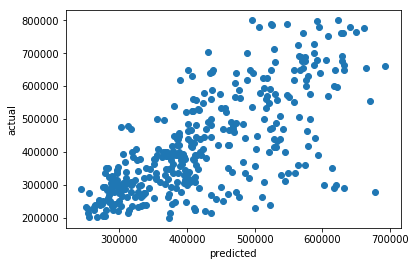

In [112]:
rf_pred = fitted_models['rf'].predict(X_test)
# plots the scatter plot
plt.scatter(rf_pred, y_test)
# predicted transaction price on the X-axis
plt.xlabel('predicted')
# actual transaction price on the y-axis
plt.ylabel('actual')
plt.show()

A visual check is always nice way to confirm our model's performance.
* What observations can you glimpse from our model?
     - pretty accurate in lower ranges, error increases significantly in >500k range

<br>
### Finally, let's save the winning model.

Take a look at the data type of your final model.

In [113]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

**It's still a <code style="color:steelblue">GridSearchCV</code> data type. **

Normally what we really care about is the actual winning model <code style="color:steelblue">Pipeline</code>.

we can use the <code style="color:steelblue">best\_estimator_</code> method to niftly access it:

In [115]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

If we output our pipeline object directly, we can also see the optimal hyperparameters of our model

In [116]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

The best values for our hyperparameters were-
* <code style="color:steelblue">n_estimators: <span style="color:crimson">200</span></code>
* <code style="color:steelblue">max_features : <span style="color:crimson">'auto' or 0.33</span></code>

Now we use <code style="color:steelblue">pickle</code>, which saves Python objects to our disk.

In [117]:
import pickle

Save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.

In [118]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

Done. We've built a successful model trained using machine learning!

The essential steps we took to successfully train and find our best model:
* Split the dataset into separate training and test sets.
* Set up the preprocessing pipelines for all our different models.
* Tuned our models using k-fold cross-validation.
* Evaluated our models based off metrics, selected the best model and saved it.